# Performance Evaluation

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
%matplotlib inline

## Regression Performance
- MAE (mean absolute error)
- MSE (mean square error)
- RMSE (root mean square error)
- R-squared 



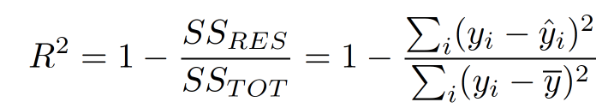

## Classification Performance 
- 분류 알고리즘 비교
  - 리지 규제, 라쏘 규제
  - 교차검증
  - 정적 성능평가 Confusion matrix  
  - 동적 성능평가 ROC

- Data
  - 포도주 품질 분류 https://goo.gl/Gyc8K7
  - https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine/notebook



## Classification Example (포도주 품질 평가 데이터)

### Import dataset

In [9]:
!curl -L https://goo.gl/Gyc8K7 -o winequality-red.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100   144    0   144    0     0    200      0 --:--:-- --:--:-- --:--:--   200
100   144    0   144    0     0    199      0 --:--:-- --:--:-- --:--:--     0

100   318  100   318    0     0    279      0  0:00:01  0:00:01 --:--:--   279

 15   98k   15 15367    0     0   7828      0  0:00:12  0:00:01  0:00:11  7828
100   98k  100   98k    0     0  43569      0  0:00:02  0:00:02 --:--:--  236k


In [10]:
wine = pd.read_csv('./winequality-red.csv')
print(wine.shape)
wine.head(5)

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


- fixed acidity - 결합 산도 
- volatile acidity - 휘발성 산도 
- citric acid - 시트르산 
- residual sugar - 잔류 설탕 
- chlorides	 - 염화물 
- free sulfur dioxide - 자유 이산화황 
- total sulfur dioxide - 총 이산화황 
- density - 밀도 
- pH - pH 
- sulphates - 황산염 
- alcohol - 알코올 
- quality - 품질 (0 ~ 10 점)

In [11]:
wine.info() # 데이터 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Preprocessing (Label 만들기)

In [13]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

#### Make to binary dataset

In [14]:
# 품질이 좋고 나쁜 것을 나누는 기준 설정
# 6.5를 기준으로 bad(0) good(1)으로 나눈다 (임의로 나눈 것)
my_bins = (2.5, 6.5, 8.5)
groups = [0, 1]
wine['qual'] = pd.cut(wine['quality'], bins = my_bins, labels = groups) 

wine['qual'].value_counts()

0    1382
1     217
Name: qual, dtype: int64

In [15]:
X = wine.drop(['quality', 'qual'], axis = 1) 
y = wine['qual'] 

y.value_counts()

0    1382
1     217
Name: qual, dtype: int64

In [16]:
X[:3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8


### Standard Scaling (표준 스케일링)
- transform the dataset to Gaussian dist (0, 1) - numerical features only
- test dataset should also be scaled

In [17]:
sc = StandardScaler()
X = sc.fit_transform(X)  # fit and transform

In [18]:
X[:3]

array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, -0.16942723,  0.09635286,
        -0.08366945,  0.22904665,  0.13426351, -0.33117661, -0.04808883,
        -0.58477711]])

In [19]:
np.random.seed(11)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1279, 11), (1279,), (320, 11), (320,))

### Model scores

#### Linear model (Stochastic Gradient Descent method)

In [20]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd.score(X_test,y_test)

0.81875

#### Decesion Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
clf.score(X_train,y_train), clf.score(X_test,y_test)

(0.9335418295543393, 0.878125)

#### Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300, max_depth=5) 
rfc.fit(X_train, y_train)
rfc.score(X_train,y_train), rfc.score(X_test,y_test)

(0.9296325254104769, 0.88125)

#### Support Vector Classifier (SVC)

In [23]:
svc = SVC()   # default: C=1.0, kernel='rbf', gamma='scale' 
svc.fit(X_train, y_train)
svc.score(X_train,y_train), svc.score(X_test,y_test)

(0.8991399530883503, 0.88125)

#### Logistic Regression

In [24]:
log = LogisticRegression()
log.fit(X_train, y_train)
log.score(X_train,y_train), log.score(X_test,y_test)

(0.8819390148553558, 0.86875)

#### Cross validation(교차 검증)

In [25]:
# estimator = 모델, cv는 분할 블록의 갯수
rfc_eval = cross_val_score(rfc, X, y, cv = 5)  
rfc_eval, rfc_eval.mean()

(array([0.875     , 0.871875  , 0.875     , 0.86875   , 0.88401254]),
 0.8749275078369905)

### Performace metrics

####  Performance : 정적 평가, 혼돈 매트릭스 (confusion_matrix)

In [26]:
y_pred = sgd.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[253,  16],
       [ 42,   9]], dtype=int64)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       269
           1       0.36      0.18      0.24        51

    accuracy                           0.82       320
   macro avg       0.61      0.56      0.57       320
weighted avg       0.78      0.82      0.79       320



#### Score (or Probability)

In [28]:
y_score = sgd.decision_function(X_test)   # sgd 는 predict_proba() 가 없음
# decision_function(): The confidence score for a sample is the signed distance 
# of that sample to the hyperplane

In [29]:
y_score[:5]

array([ 0.79259076, -2.95713556, -5.74014753, -1.21517746, -5.88022051])

#### Ranking (순서를 평가)

In [30]:
result = pd.DataFrame(list(zip(y_score, y_pred, y_test)), 
                      columns=['score', 'predict', 'real'])
result['correct'] = (result.predict == result.real)
result.head()

,score,predict,real,correct
0,0.792591,1,0,False
1,-2.957136,0,0,True
2,-5.740148,0,0,True
3,-1.215177,0,0,True
4,-5.880221,0,0,True


#### ROC and AUC (맞춘 순서로 평가)

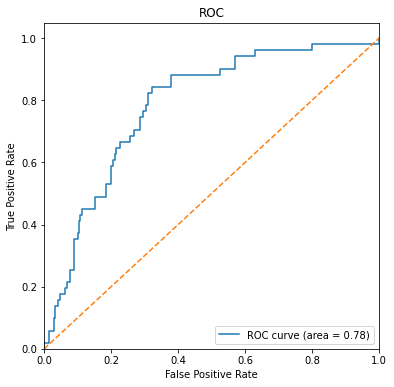

In [31]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

#### Precision-Recall curve

0.36505616448154043


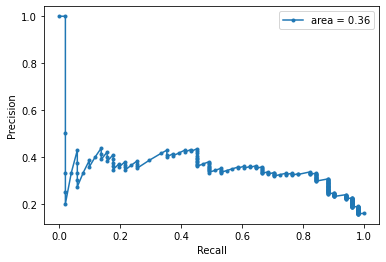

In [36]:
from sklearn.metrics import average_precision_score
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
auc_score = auc(recall, precision)
print(average_precision_score(y_test, y_score))
plt.plot(recall, precision, marker='.', label='area = %0.2f' % auc_score)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()